**MASTER'S DEGREE IN APPLIED ARTIFICIAL INTELLIGENCE**.

**Course: TC5044.10 - Machine learning operations**

Tecnológico de Monterrey

Professor 	
Dr. Gerardo Rodríguez Hernández

**Week 5**
Phase 1 | Project Progress

---
**Team 30**
*   Jorge Antonio Acosta Rosales - A01381552
*   Antonio Olvera Donlucas - A01795617
*   Fernando Jaime Sanchez - A01795383
*   Jorge Mariles Estrada - A01335663
*   Jose Luis Artigas Arroyo - A01794906

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

# Creating the classes

In [2]:
class DataExplorer:
    @staticmethod
    def explore_data(data):
        print(data.head().T)
        print(data.describe())
        print(data.info())
    
    @staticmethod
    def plot_histograms(data):
        data.hist(bins=15, figsize=(15, 10))
        plt.show()

    @staticmethod
    def plot_correlation_matrix(data):
        plt.figure(figsize=(12, 8))
        sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
        plt.show()

### Machine Failure Model

In [3]:
class PredictiveMaintenanceModel:
    def __init__(self, filepath):
        self.filepath = filepath
        self.model_pipeline = None
        self.X_train, self.X_test, self.y_train, self.y_test = [None] * 4

        # Define the target variable
        self.TARGET = "Machine failure"

        # Define numerical and categorical columns
        self.numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 
                                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
        self.categorical_columns = ['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

        # Define the preprocessing pipeline
        self.preprocessor = ColumnTransformer([
            ('minmax_scaler', StandardScaler(), self.numerical_columns),
            ('onehot', OneHotEncoder(drop='first'), self.categorical_columns)
        ], remainder='drop')  # Dropping unspecified columns like 'Product ID' and 'UDI'

        # Define the full pipeline
        self.model_pipeline = Pipeline([
            ('preprocessing', self.preprocessor),
            ('classifier', LogisticRegression(max_iter=1000))
        ])

    def load_data(self):
        self.data = pd.read_csv(self.filepath)
        DataExplorer.explore_data(self.data)
        return self
    
    def preprocess_data(self):
        # Drop columns that are not needed
        self.interim = self.data.drop(['Product ID', 'UDI'], axis=1)
        
        # Define features and target
        X = self.interim.drop(self.TARGET, axis=1)
        y = self.interim[self.TARGET]
        
        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        return self
    
    def train_model(self):
        self.model_pipeline.fit(self.X_train, self.y_train)
        return self
    
    def evaluate_model(self):
        print("Model Evaluation:")
        y_pred = self.model_pipeline.predict(self.X_test)
        
        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(self.y_test))
        disp.plot(cmap='Blues')
        plt.show()
        
        # Classification Report
        report = classification_report(self.y_test, y_pred)
        print("Classification Report:")
        print(report)
        return self
    
    def cross_validate_model(self):
        scores = cross_val_score(self.model_pipeline, self.X_train, self.y_train, cv=5)
        print("Cross-Validation Accuracy Scores:", scores)
        print("Average Accuracy with CV:", np.mean(scores))
        return self


# Executing the code

                              0       1       2       3       4
UDI                           1       2       3       4       5
Product ID               M14860  L47181  L47182  L47183  L47184
Type                          M       L       L       L       L
Air temperature [K]       298.1   298.2   298.1   298.2   298.2
Process temperature [K]   308.6   308.7   308.5   308.6   308.7
Rotational speed [rpm]     1551    1408    1498    1433    1408
Torque [Nm]                42.8    46.3    49.4    39.5    40.0
Tool wear [min]               0       3       5       7       9
Machine failure               0       0       0       0       0
TWF                           0       0       0       0       0
HDF                           0       0       0       0       0
PWF                           0       0       0       0       0
OSF                           0       0       0       0       0
RNF                           0       0       0       0       0
               UDI  Air temperature [K] 

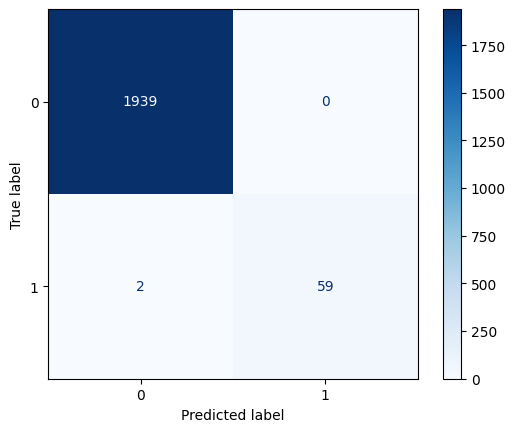

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Cross-Validation Accuracy Scores: [0.999375 1.       0.998125 0.998125 0.998125]
Average Accuracy with CV: 0.99875


In [4]:
filepath = r'D:\Dev\Python Projects\MLOps\phase_1.0\data\raw\ai4i2020.csv'
model = PredictiveMaintenanceModel(filepath)
model.load_data()
model.preprocess_data()
model.train_model()
model.evaluate_model()
model.cross_validate_model()